In [1]:
import pandas as pd

df = pd.read_csv("D:/project/ml_project/notebook/approval/loan_approval_dataset.csv")

In [2]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [3]:
df.shape

(4269, 12)

In [5]:
x = df.drop(["loan_status"],axis=1)
y = df["loan_status"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       324
           1       0.97      0.99      0.98       530

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854

Accuracy of Random Forest is is :  97.42388758782201


Text(0.5, 1.0, 'Confusion matrix: Random Forest')

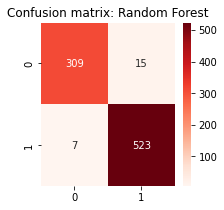

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rfpred = rf.predict(x_test)

print(classification_report(y_test,rfpred))
print("Accuracy of Random Forest is is : ",accuracy_score(y_test,rfpred)*100)

# Creating confusion matrix
plt.figure(figsize = (3,3))
sns.heatmap(confusion_matrix(y_test, rfpred), annot=True, cmap="Reds", fmt='g')
plt.title('Confusion matrix: Random Forest')

In [8]:
from sklearn.model_selection import GridSearchCV

# Creating parameter grid
parameter_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'n_estimators': [200, 500, 800],
    'max_leaf_nodes' : [20, 30, 40]
}

# Applying gridsearch methode 
grid_search = GridSearchCV(estimator=rf, param_grid=parameter_grid, cv=3)

In [10]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100],
                         'max_leaf_nodes': [20, 30, 40],
                         'n_estimators': [200, 500, 800]})

In [11]:
grid_search.best_params_


{'bootstrap': True, 'max_depth': 90, 'max_leaf_nodes': 30, 'n_estimators': 200}

In [15]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# creating RepeatedStratifiedKFold 
cross_validation = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=10)

# Performing Cross-Validation
k_scores = cross_val_score(rf, x, y, scoring='accuracy', cv=cross_validation
                           , n_jobs=-1, error_score='raise')

NameError: name 'np' is not defined

In [16]:
import numpy as np
# Accuracy Score
print('Accuracy: %.3f (%.3f)' % (np.mean(k_scores), np.std(k_scores)))

Accuracy: 0.983 (0.005)
